# 선형회귀(Numpy)
> 선형 회귀는 독립 변수(x)와 종속 변수(y)간의 선형 관계를 모델링해서 예측하는 통계기법

## 모델
- 단순 모델 : y = ax + b
- 다중 모델 : y = a1x1 + a2x2 + ... + anxn + b

## 머신 러닝 활용
- y와 x가 결정 => {a, b} 매개 변수를 찾아야 함.
- y와 x가 선형 관계를 가져야 함. 
- 이상치와 다중공선성.
- 다중공선성이 있다 -> 전처리를 잘못했다. 원데이터로부터 파생테이터를 잘못만들었다. -> 결측치 어떻게 봉합니까?
- 데이터가 상관관계가 있다고 믿는다. -> 데이터간의 관계를 만든다.
- 지도 학습, 비지도 학습
- 비지도 학습은 군집 알고리즘이 핵심: 비슷한 애들까리 묶는다. 경향성이 있다. 군집.

## {a, b} 매개 변수를 찾아야 함!
- 매개변수를 찾는 방법: 최소제곱법, 경사하강법
- 평가는 : MSE, R^2


###### [깨알 노트]
###### 점과 직선의 방정식

---

## 예제1. 
>어떤 회사의 연도별 매출이 광고비에 의존한다고 가정하자(선형**이기 때문에!)
><br>아래 데이터가 주어질 때, 광고비가 8일 때 매출을 예상하세요!

|광고비|매출|
:---|:---:
|2|81|
|4|93|
|6|91|
|8|?|

    -> 광고비 x 이고, 매출 y라고 생각.
       종속 y를 찾으세요 라는 문제로 생각!

    -> y = ax + b
        81 = 2a + b
        93 = 4a + b
        91 = 6a + b
        ? = 8a + b

    -> 방법1: 무차별 대입법(반복문으로)
    -> 방법2: 연립방정식
    -> 방법3: 최소제곱법
    -> 방법4: 경사하강법

In [1]:
import numpy as np

# 데이터 준비
X = np.array([2,4,6])
y = np.array([81, 93, 91])

# 최소제곱법(평균)
X_mean = np.mean(X)
y_mean = np.mean(y)

# 최소제곱법(계산)
# Cov(x,y) / Var(x) => a를 구하는 방법(통계)
# a = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X-X_mean)**2)
# b = y_mean - a * X_mean
X = np.column_stack([X, np.ones(len(X))])
a, b = np.linalg.lstsq(X, y)[0]

print(f"기울기: {a:.2f}, 절편 : {b:.2f}")

x_pred = 8
y_pred = a * x_pred + b
print(f"광고비(8) 예측 매출: {y_pred:.2f}")

기울기: 2.50, 절편 : 78.33
광고비(8) 예측 매출: 98.33


---

## 예제2: 
>어떤 회사의 

가격(x1)|온도(x2)|판매량(y)
:---|:---:|:---
5|20|65
7|22|70
9|23|60
8|24|?

- y = a1x1 + a2x2 + b

In [2]:
import numpy as np

# 데이터 준비
X = np.array([[5,20], [7,22], [9,23]])
y = np.array([65, 70, 60])
X_bias = np.column_stack([X, np.ones(len(X))])
# 최소제곱법(계산)
coeffs = np.linalg.lstsq(X_bias, y)[0]
print(f"기울기1: {coeffs[0]:.2f}, 기울기2: {coeffs[1]:.2f}, 절편 : {coeffs[-1]:.2f}")
y_pred = np.dot([8,24,1], coeffs)
print(f"{y_pred:.2f}")

기울기1: -12.50, 기울기2: 15.00, 절편 : -172.50
87.50


2x + 3y = 8

[[2 3]
 [4 -1]]

[[X]
 [y]]

* 
* 역행렬은 항상 존재하는 것이 아니기 때문에 

# Numpy를 활용한 선형회귀 모델(v2)

> pip install scikit-learn 설치하세요

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

In [5]:
#sns.pairplot(iris_df, hue="target")
#plt.suptitle("Iris Data Pair Plot")
#plt.show()

In [6]:
# 1. 데이터 전처리
# 2. (전처리 데이터로) 모델 만들기
# 3. 예측

In [7]:
# 학습 데이터 뽑기: 이렇게 범주형, 카테고리가 나눠져 있는 데이터는 각 카테고리별로 균질하게 뽑아야 한다.
# 데이터 크기에 따라 아래 중 하나의 비율로 나눔
# * 70:30
# * 80:20
# * 75:25

# 데이터 조작(학습용 데이터)

In [8]:
X = np.column_stack([iris.data[:, 0], 
                     iris.data[:, 2], 
                     iris.data[:, 3]])
y = iris.data[:, 1]
print(X.shape, y.shape)

(150, 3) (150,)


In [9]:
# 학습데이터 뽑기
def custom_train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx = indices[:split_idx]
    test_idx = indices[split_idx:]

    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = custom_train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 3) (45, 3) (105,) (45,)


In [11]:
# 최소제곱법
def fit_linear_regreesion_lsq(X, y):
    X_bias = np.column_stack([np.ones(len(X)), X]) # 매개변수 순서!
    cofficients, _, _, _ = np.linalg.lstsq(X_bias, y)
    intercept_ = cofficients[0]
    coef_ = cofficients[1:]
    return coef_, intercept_

In [12]:
# 경사하강법
def fit_linear_regression_gd(X, y, 
                             learning_rate=0.01, 
                             max_iter=1000,
                             tolerance=1e-6):    
    n_samples, n_features = X.shape
    weights = np.random.normal(0, 0.01, n_features+1)
    X_with_bias = np.column_stack([np.ones(n_samples), X])
    cost_history = []
    for i in range(max_iter):
        predictions = X_with_bias @ weights
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)
        gradients = (2 / n_samples) * X_with_bias.T @ (predictions-y)
        weights = weights - learning_rate* gradients # <- 이게 목적임!!
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"경사하강법이 {i+1}번째 반복에서 수렴했습니다.")
            break    
    coef_ = weights[1:]
    intercept_ = weights[0]
    return coef_, intercept_, cost_history  

In [13]:
def predict_linear_regreesion(X, coef_, intercept_):
    return X @ coef_ + intercept_

In [14]:
coef_, intercept_ = fit_linear_regreesion_lsq(X_train, y_train)
y_pred_lsq = predict_linear_regreesion(X_test, coef_, intercept_)

In [15]:
coef_, intercept_, _ = fit_linear_regression_gd(X_train, y_train)
y_pred_gd = predict_linear_regreesion(X_test, coef_, intercept_)

In [16]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)    

In [17]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true-y_pred)**2)
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true-y_mean)**2)
    r2 = 1 - (ss_res  / ss_tot)    
    return r2

In [18]:
mse_lsq = mean_squared_error(y_test, y_pred_lsq)
r2_lsq = r2_score(y_test, y_pred_lsq)
print(mse_lsq, r2_lsq)

0.08472197157942186 0.38100017156758104


In [19]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)
print(mse_gd, r2_gd)

0.10692359591372268 0.21878957380109543


# 성능을 높이자!

In [20]:
def std_feat(X_train, X_test): # 평균이 0이고, 표준편차 1
    mean = np.mean(X_train, axis=0) # 무조건 학습 데이터 기준으로 
    std = np.std(X_train, axis=0)

    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std

    return X_train_scaled, X_test_scaled

In [21]:
X_train_scaled, X_test_scaled = std_feat(X_train, X_test)

In [22]:
coef_, intercept_, _ = fit_linear_regression_gd(X_train_scaled, y_train)
y_pred_gd = predict_linear_regreesion(X_test_scaled, coef_, intercept_)

In [23]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)
print(mse_gd, r2_gd)

0.09576411976970942 0.30032348631237715


# learning rate에 따른 학습 결과를 확인

경사하강법이 507번째 반복에서 수렴했습니다.


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_core\_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\user\AppData\Local\Temp\ipykernel_7368\2123151041.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
C:\Users\user\AppData\Local\Temp\ipykernel_7368\2123151041.py:12: RuntimeWarning: overflow encountered in square
  cost = np.mean((predictions - y) ** 2)


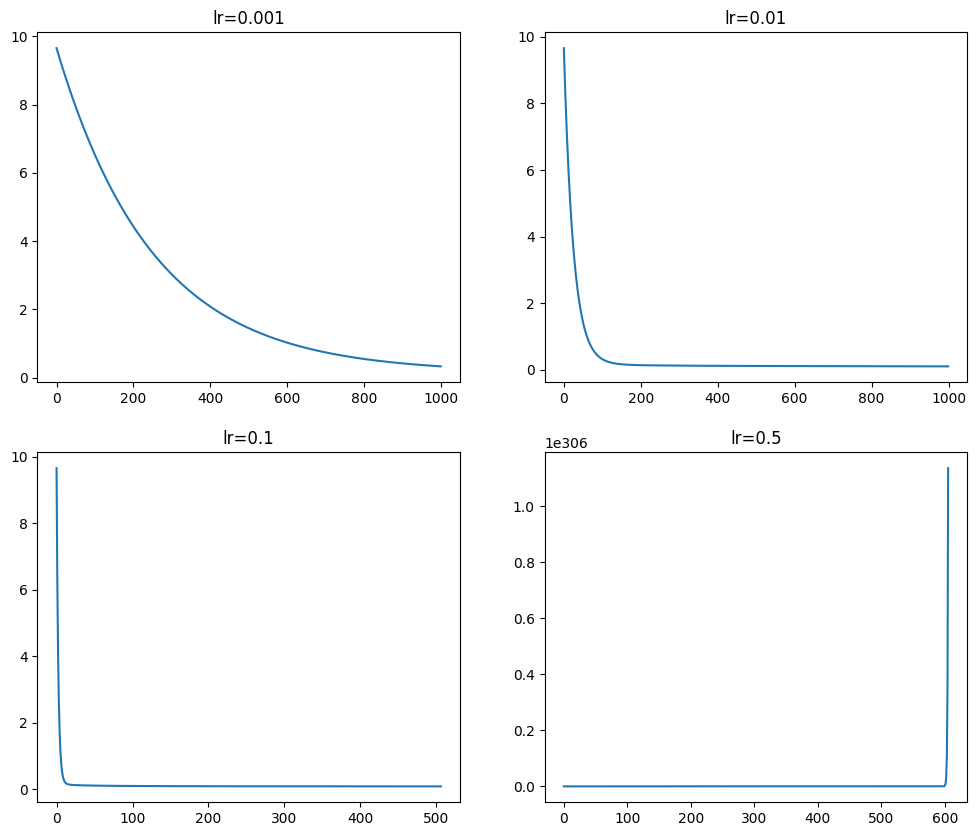

In [26]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel() # 그냥 순서대로 그리고 싶어서

for i, lr in enumerate(learning_rates):
    _, _, cost_history = fit_linear_regression_gd(X_train_scaled,
                                                  y_train,
                                                  learning_rate=lr)
    axes[i].plot(cost_history)
    axes[i].set_title(f"lr={lr}")

---

---

# 경사하강법
적당한 거리만큼의 변경량은 일동시키는것
하이퍼 파라미터

In [27]:
    # [정말정말 중요]: 경사하강법은 이상치에 매우 민감하다.....엄청!
    # 이상치를 일단은 "눌러야 됨"
    # 정규화부터 해야 함(파이토치 사용할 때 주의!!!!! -> 정규화를 알아서 해주는 메서드인지, 정규화를 해서 줘야하는 메소드인지)
    #
    #
#def fit_linear_regression_lsq(X, y): -> 기울기와 절편
def fit_linear_regression_gd(X, y, 
                             learning_rate=0.01, 
                             max_iter=1000,
                             tolerance=1e-6):
    """
    learning_rate(학습률): 기울기를 얼마만큼 이동시키나요?
    max_iter(최대반복횟수): max_iter번 정도 기울기를 움직여보겠다!!!!
    tolerance(수렴조건): max_iter번 중에 tolerance를 만족하면 멈춰주세요!!
    """
    # 150 , 3
    n_samples, n_features = X.shape
    weights = np.random.normal(0, 0.01, n_features+1) # weight 가중치, np.random.normal() 0에서 0.01사이에 있는 값을 location, scale, size
    # bias 절편, 머신러닝에선 threshold
    X_with_bias = np.column_stack([np.ones(n_samples), X]) # iris 데이터니까 150개

    cost_history = []

    for i in range(max_iter):

        # 1. 예측값 계산
        #[[절편, 특징1, 특징2, 특징3],   [가중치1,
        #[절편, 특징1, 특징2, 특징3], X  가중치2,
        #[절편, 특징1, 특징2, 특징3]]       가중치3,
        #                                 가중치4]
        predictions = X_with_bias @ weights
        # 2. 비용함수를 계산
        cost = np.mean((predictions - y)**2) # MSE -> 딥러닝에서는 비용함수를 다 따로 만든다!
        cost_history.append(cost)
        # 3. 기울기 계산 (편미분 (aj/aw) = (2/n) * X^T * (Xw - y))
        gradients = (2 / n_samples) * X_with_bias.T @ (predictions - y)
        # 4. 가중치를 업데이트
        weights = weights - learning_rate*gradients # 이게 목적임!!!!
        # 5. 수렴 조건 점검
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"경사하강법이 {i+1}번째 반복에서 수렴했습니다.")
            break
    
    coef_ = weights[1:]
    intercept_ = weights[0]
    return coef_, intercept_

IndentationError: expected an indented block (814998434.py, line 11)

In [ ]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train) ##### scikit-learn은 전부 이렇게 사용하도록
y_pred_br = br.predict(X_test) ##### scikit-learn은 전부 이렇게 사용하도록
mse_br = mean_squared_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)
print(mse_br, r2_br)

0.08450878298803613 0.3825577805210957


---

## 1. 전처리 -> 2. 모델 -> 3. 예측 -> 4. 평가

### [전처리]
>이상치 잘 처리해야 한다!!!!!<br>
>* 결측치<br>
>* 숫자<br>**
>* <br>



### [모델]
>무슨 경향을 알려주려나 보다<br>결정트리 외에는 전부 기울기 싸움<br>
>* 기울기: 방향성, 예측 -> 답이 아니기 때문에 오차가 생긴다!<br>
>* 절편: 

### [예측]
><br>
>* y hat<br> 

### [평가]
>오차<br>
>* |y hat - y|<br>

In [ ]:
# 평균제곱오차
# yhat - y
# y - yhat
def mean_squared_error(y_true: np.array, y_pred: np.array): # 매개변수로 반드시 실제값과 예측값
    return np.mean((y_true - y_pred)**2)

In [ ]:
def r2_score(y_true: np.array, y_pred: np.array):
    ## 잔차제곱합
    ss_res = np.sum((y_true - y_pred)**2)

    ## 총제곱합
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean)**2)

    ## r2
    r2 = 1 - (ss_res / ss_tot)
    return r2

# 회귀에 사용되는 평가 지표
- MSE(평균제곱오차) : -> (평균오차)**2 -> 양수 -> 0일때 Best!!!! -> MSE는 숫자가 작을수록 성능이 높다!
- RMSE(평균제곱근오차) : | |
- MAE(평균절대오차) : 이상치 때문에 쓴다.

- R^2(결정계수) : 상관관계가 높을 수록 1에 가까워짐(0.78이면 78%의 설명력을 가진다고 해석)

##### 인공지능:
> 데이터(X, y)에서 숨겨진 패턴(a, b)를 자동으로 찾는 알고리즘

# 경사하강법
적당한 거리만큼의 변경량은 일동시키는것
하이퍼 파라미터

In [ ]:
    # [정말정말 중요]: 경사하강법은 이상치에 매우 민감하다.....엄청!
    # 이상치를 일단은 "눌러야 됨"
    # 정규화부터 해야 함(파이토치 사용할 때 주의!!!!! -> 정규화를 알아서 해주는 메서드인지, 정규화를 해서 줘야하는 메소드인지)
    #
    #
#def fit_linear_regression_lsq(X, y): -> 기울기와 절편
def fit_linear_regression_gd(X, y, 
                             learning_rate=0.01, 
                             max_iter=1000,
                             tolerance=1e-6):
    """
    learning_rate(학습률): 기울기를 얼마만큼 이동시키나요?
    max_iter(최대반복횟수): max_iter번 정도 기울기를 움직여보겠다!!!!
    tolerance(수렴조건): max_iter번 중에 tolerance를 만족하면 멈춰주세요!!
    """
    # 150 , 3
    n_samples, n_features = X.shape
    weights = np.random.normal(0, 0.01, n_features+1) # weight 가중치, np.random.normal() 0에서 0.01사이에 있는 값을 location, scale, size
    # bias 또는 intercept 절편, 머신러닝에선 threshold
    X_with_bias = np.column_stack([np.ones(n_samples), X]) # iris 데이터니까 150개

    cost_history = []

    for i in range(max_iter):

        # 1. 예측값 계산
        #[[절편, 특징1, 특징2, 특징3],   [가중치1,
        #[절편, 특징1, 특징2, 특징3], X  가중치2,
        #[절편, 특징1, 특징2, 특징3]]       가중치3,
        #                                 가중치4]
        predictions = X_with_bias @ weights
        # 2. 비용함수를 계산
        cost = np.mean((predictions - y)**2) # MSE -> 딥러닝에서는 비용함수를 다 따로 만든다!
        cost_history.append(cost)
        # 3. 기울기 계산 (편미분 (aj/aw) = (2/n) * X^T * (Xw - y))
        gradients = (2 / n_samples) * X_with_bias.T @ (predictions - y)
        # 4. 가중치를 업데이트
        weights = weights - learning_rate*gradients # 이게 목적임!!!!
        # 5. 수렴 조건 점검
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"경사하강법이 {i+1}번째 반복에서 수렴했습니다.")
            break
    
    coef_ = weights[1:]
    intercept_ = weights[0]
    return coef_, intercept_

# scikit-learn
>파이썬에서 머신러닝 모델을 쉽게 학습할 수 있도록 만들어주는 라이브러리

1. 학습 데이터와 테스트 데이터를 나눠주는 방법
2. 데이터의 (전처리)특성공학
3. 모델(선형모델, 통계모델, 트리모델, 앙상블모델)
    - 지도 학습 모델
    - 비지도 학습 모델
    - 하지만, 딥러닝 모델은 주지 않음!!
4. 평가
5. 최적화
6. 모델을 이진데이터로 변환